# Pymaceuticals Inc.
---

### Analysis

The purpose of this study is to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens. It should be noted that there were originally 249 mice observed in this study but as the mice with ID: g989's results were duplicated, this mouse was removed from observations to reduce the impact of unreliable data. 


- 248 Mice who were on the Capomulin treatment had an average mean tumor volume of 40.67 mm3 (2.d.p) accross all their timepoint observations, this was the second lowest mean average accross all treatment types observed. The treatment type Ramicane had the lowest with a average mean tumor volume of 40.22 mm3 (2.d.p) whereas mice treated on Ketapril had the highest average tumor volume of 55.24 mm3 (2.d.p).


- The standard error calculated for mice on Capomulin was 0.33 (2.d.p), this indicates how different the population mean is likely to be from a sample mean. As observed from the barchart showing the total number of observations per drug regimen, mice on the Capomulin treatment had the highest number of mouse timepoint observations (narrowly exceeding the number of mice on the Ramican treatment), this is good if focusing our analysis on the Capomulin treatment regimen as it could explain why Capomulin had one of the lowest tumor volume standard error's accross all treatments. The treatment: Propriva had the lowest number of observations this should be considered if comparing it to Ketrapril's performance.


- The proportion of male observations to female observations in this study was fairly proportional (51%) male, (49%) female, with there being marginally more males. However, this suggests that gender is not a factor which may have skewed any of the results being observed with it being reasonable to assume that different genders may react differently to treatments due to biological differences.  


- The mouse with ID l509 was put on the Capomulin treatment over a course of 45 days with 5-day intervals. Over the course of this mouse’s treatment, it’s tumor volume decreased by approximately 4mm3, the sharpest decrease in it’s tumor was between days 30 and 35. These results show a promise that the treatment of this mouse was successful. 


- When considering the distribution of final tumor volume boxplots for a chosen select of treatment groups, mice on the Capomulin treatment had a low distribution of final tumor volumes in comparison with Infubinol and Ceftamin. It appears that it's peer treament regiment Ramicane is it's main competitor as their values have been marginal throughout this analysis, both their median lines are in line of eachother's box regions. However, Capomulin's box length is more compact than Ramicane's so it means mice on Capomulin had a lower interquartile range (spread of mid region data points when ordered cluster more tightly). 


During this study's regression analysis for mice on the Capomulin treatment, the independent variable observed was the Mouse’s weight, the dependent variable was the average observed tumor volume. 

-	These variables were calculated to have a Person’s correlation coefficient of 0.84 (2.d.p), this value suggests that the variability between a mouse's weight and their average observed tumor volume is strong. However, correlation alone does not suggest causation, the Coefficient of determination (r-squared) value can however, it was found to suggest that the relationship between a mouse's weight and their average observed tumor volume explains 71% of the variation in data whilst the remaining 29% is caused by variables not observed. The calculated line equation can also be used to extrapolate unchartered datapoints.

To summarise, Capomulin's treatment was a success in reducing SSC tumor volumes within mice.

In [1]:
# Dependencies and Setup.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress


# Study data files.
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Reads the Mouse metadata and the Study Results CSV files and saves them each as a DataFrame.
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combines the Mouse metadata and Study Results results into a single DataFrame.
# No benefit of using outer join for this dataset as only the Mice ID's in the Mouse Metadata are contained within the Study Results.
combined_mouse_results_df = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="right", sort=False)

# Displays the first five rows of the DataFrame which has been combined.
combined_mouse_results_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [42]:
# The below outputs the number of individual mice observed in the study.
mouse_groups = combined_mouse_results_df.groupby("Mouse ID")
number_of_mice = len(mouse_groups["Mouse ID"])
print(f"A total of {number_of_mice} mice identified with SCC tumors were observed in the Study")


A total of 249 mice identified with SCC tumors were observed in the Study


In [3]:
# The data should be uniquely identified by Mouse ID and Timepoint.
# e.g. Mouse ID 'B128' should only have unique Timepoint values (0:50:5).

# Extracts the Mouse ID - Timepoints duplicated using loc.
duplicated_mice_timepoints = combined_mouse_results_df.loc[combined_mouse_results_df.duplicated(subset=["Mouse ID", "Timepoint"]), :]

# Shows an array of the duplicate mice ID numbers.
duplicated_mice_timepoints["Mouse ID"].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicated_mice_timepoints = combined_mouse_results_df.loc[combined_mouse_results_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False), :]
all_duplicated_mice_timepoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_mouse_results_df.loc[combined_mouse_results_df["Mouse ID"] != "g989", :]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [6]:
# The below outputs the number of individual mice observed in the study after removing duplicated Mouse ID - Timepoints.
mouse_groups = cleaned_df.groupby('Mouse ID')
number_of_mice = len(mouse_groups['Mouse ID'])
print(f"A total of {number_of_mice} mice are now considered in this study's analysis")

A total of 248 mice are now considered in this study's analysis


## Summary Statistics

In [7]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

# Groups the data by Drug Regimen and stores the Tumor Volume (mm3) values as an object.
tumor_volumes_per_drug_regimen = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"]

# Calculates each of the summary statistics for tumor volume based on each drug regimen. 
mean = tumor_volumes_per_drug_regimen.mean()
median = tumor_volumes_per_drug_regimen.median()
variance = tumor_volumes_per_drug_regimen.var()
standard_deviation = tumor_volumes_per_drug_regimen.std()
SEM = tumor_volumes_per_drug_regimen.sem()

# Compiles all of the summary statistics into a DataFrame. 
summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean,
                                   "Median Tumor Volume":median,
                                   "Tumor Volume Variance": variance,
                                   "Tumor Volume Std.Dev.":standard_deviation,
                                   "Tumor Volume Std.Err":SEM})

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produces the same summary statistics in a single line:
cleaned_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

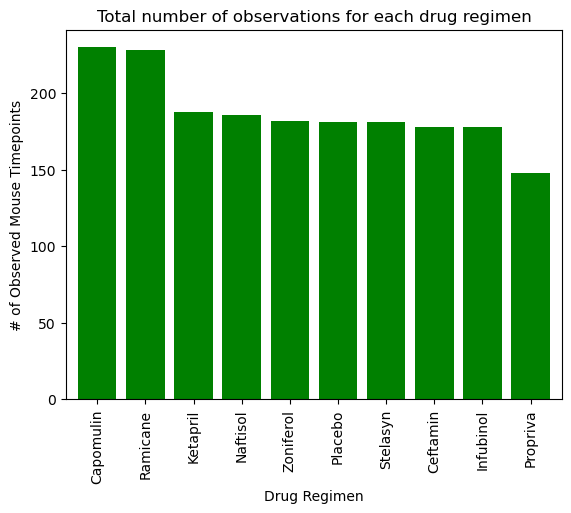

In [20]:
# Barchart Pandas
# Counts the number of Mouse ID's for each Drug Regimen and stores these values in a DataFrame. 
drug_regimen_observations = pd.DataFrame(cleaned_df.groupby("Drug Regimen")["Mouse ID"].count())

# Renames column in DataFrame.
drug_regimen_observations = drug_regimen_observations.rename(columns = {"Mouse ID": "No. of Observations"})

# Sorts observation values in descending order.
drug_regimen_observations = drug_regimen_observations.sort_values("No. of Observations", ascending=False)


# Bar plot showing the total number of rows (Mouse ID's) for each drug regimen using Pandas.
barchart = drug_regimen_observations.plot(kind='bar', legend=False, width=0.8, ylabel="# of Observed Mouse Timepoints", title="Total number of observations for each drug regimen", color="green")

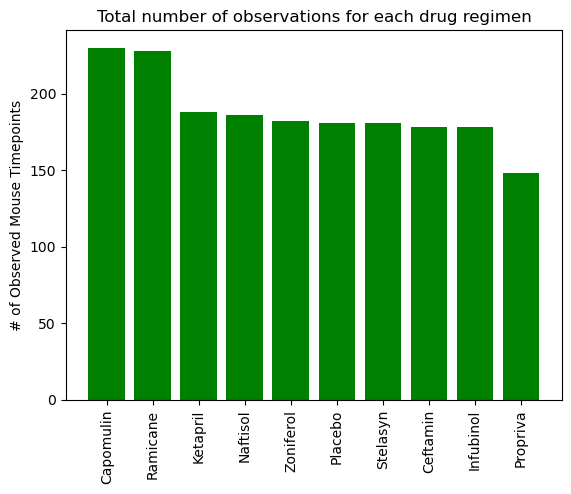

In [44]:
# Barchart pyplot

# Resets the index of the DataFrame containing our data to plot. 
drug_regimen_observations = drug_regimen_observations.reset_index()

# Sets x axis values to be a array containing the number of drug regimens in increments of one.
x_axis = np.arange(len(drug_regimen_observations))

# Sets y axis values to be the count of observations per drug regimen.
y_axis = drug_regimen_observations["No. of Observations"]

# Sets the position of the ticks to be [0:10:1]
tick_locations = [value for value in x_axis]


# Barchart showing the total number of rows (Mouse ID's) for each drug regimen using pyplot. 
barchart_pyplot = plt.bar(x_axis, y_axis, align="center", color="green")


# Sets each of the xticks to correspond with their Drug Regimen's.
plt.xticks(tick_locations, drug_regimen_observations["Drug Regimen"], rotation="vertical")

# Sets title and y label.
plt.title("Total number of observations for each drug regimen")
plt.ylabel("# of Observed Mouse Timepoints")


plt.show()

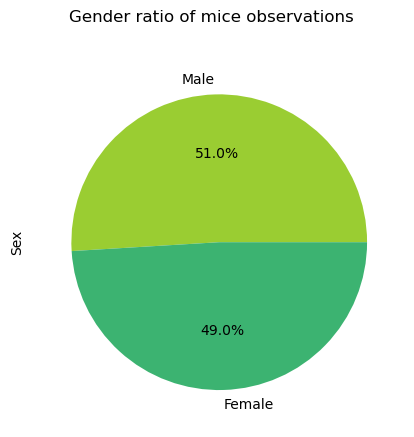

In [11]:
# Pie plot Pandas

# Gathers the number of male and female observations in the study and stores as a DataFrame. 
gender_ratio = pd.DataFrame(cleaned_df["Sex"].value_counts())

# Creates a pie plot showing the distribution of female versus male mice using Pandas.
piechart = gender_ratio.plot(kind="pie", subplots=True, legend=False, autopct="%1.1f%%", title="Gender ratio of mice observations", colors=["yellowgreen", "mediumseagreen"])

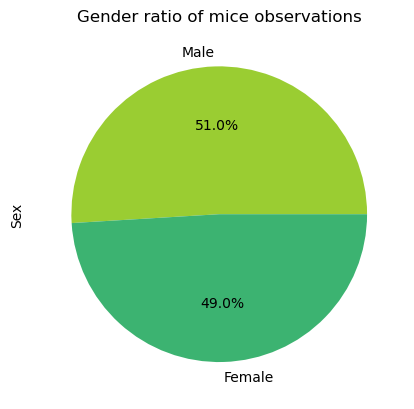

In [12]:
# Pie plot pyplot

# Gathers the number of male and female observations in the study and stores as a DataFrame. 
gender_ratio = pd.DataFrame(cleaned_df["Sex"].value_counts())


# Assigns the sizes, labels, and colors for the piechart. 
sizes = gender_ratio["Sex"]
labels = ["Male", "Female"]
colors = ["yellowgreen", "mediumseagreen"]

# Creates a pie plot showing the distribution of female versus male mice using Pandas.
piechart_pyplot = plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors)

# Sets title and y label.
plt.title("Gender ratio of mice observations")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Gets the greatest timepoint for each mouse and stores them within a new DataFrame. 
max_timepoints = pd.DataFrame(cleaned_df.groupby("Mouse ID")["Timepoint"].max())
max_timepoints = max_timepoints.reset_index()

# Merges the grouped max timepoints to the cleaned_df to get the tumor volume at the last timepoint of each mouse.
final_tumor_volumes = pd.merge(max_timepoints, cleaned_df,  how='left')

In [41]:
# List of treatments.
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Empty list to fill with tumor vol data (for plotting)
final_tumor_volume_data = []

# Loops through each of the treatments, finds all their mice's final tumor volumes and adds onto the final_tumor_volume_data list.
# Also calculates each treatment's IQR and upper/lower bounds to help inform on potential outliers.  

for treatment in treatments:
    
    # Locates the rows which contain the mice on the treatment and get their final tumor volumes.
    treatment_final_tumor_volumes = final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    
    # Add the treatments final tumor volume to the list.  
    final_tumor_volume_data.append(treatment_final_tumor_volumes)
    
    print(f"\n{treatment}'s Quartiles and Outliers: \n")
    
    # Determines outliers using the upper and lower bounds.
    quartiles = treatment_final_tumor_volumes.quantile([.25,.5,.75])
    
    Q1 = quartiles[.25]
    print(f"{treatment} has a Q1 value of: {round(Q1, 2)}")
    
    Q3 = quartiles[.75]
    print(f"{treatment} has a Q3 value of: {round(Q3, 2)}")
    
    IQR = Q3 - Q1
    print(f"{treatment} has a IQR value of: {round(IQR, 2)}")
    
    lower_bound = Q1 - (1.5 * IQR)
    print(f"{treatment} has a lower_bound value of: {round(lower_bound, 2)}")
    
    upper_bound = Q3 + (1.5 * IQR)
    print(f"{treatment} has a upper_bound value of: {round(upper_bound, 2)}\n")
    
    
    outliers = treatment_final_tumor_volumes.loc[(treatment_final_tumor_volumes < lower_bound) | (treatment_final_tumor_volumes > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers} \n")
    
    print("-------------------------------------------------------------------------------------------")


Capomulin's Quartiles and Outliers: 

Capomulin has a Q1 value of: 32.38
Capomulin has a Q3 value of: 40.16
Capomulin has a IQR value of: 7.78
Capomulin has a lower_bound value of: 20.7
Capomulin has a upper_bound value of: 51.83

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 

-------------------------------------------------------------------------------------------

Ramicane's Quartiles and Outliers: 

Ramicane has a Q1 value of: 31.56
Ramicane has a Q3 value of: 40.66
Ramicane has a IQR value of: 9.1
Ramicane has a lower_bound value of: 17.91
Ramicane has a upper_bound value of: 54.31

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 

-------------------------------------------------------------------------------------------

Infubinol's Quartiles and Outliers: 

Infubinol has a Q1 value of: 54.05
Infubinol has a Q3 value of: 65.53
Infubinol has a IQR value of: 11.48
Infubinol has a lower_bound value of: 36

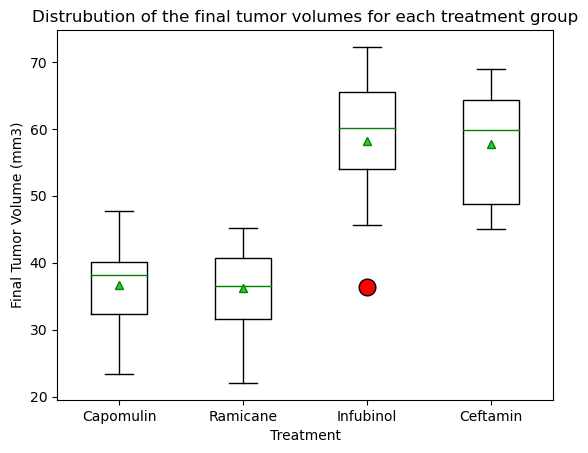

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#Formatting setup
flierprops = dict(marker='o', markerfacecolor='r', markersize=12)
medianprops = dict(color = "green")
meanprops = dict(markerfacecolor = "limegreen", markeredgecolor="green")

# PLotting box plots. 
fig_1, ax1 = plt.subplots()
ax1.boxplot(final_tumor_volume_data, labels=treatments, showmeans=True, medianprops = medianprops, flierprops=flierprops, meanprops=meanprops)

# Title and axis labels. 
ax1.set_title("Distrubution of the final tumor volumes for each treatment group")
ax1.set_xlabel("Treatment")
ax1.set_ylabel("Final Tumor Volume (mm3)")


plt.show()

## Line and Scatter Plots

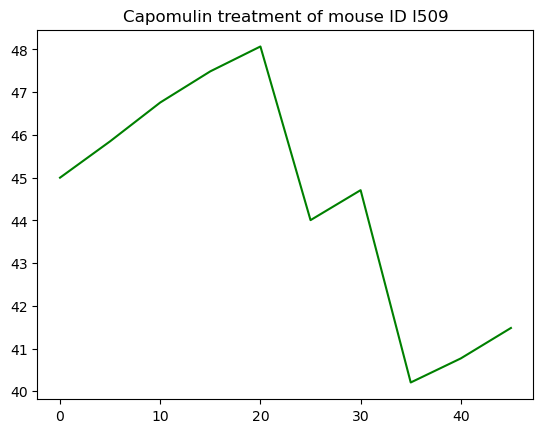

In [45]:
# Creates a new DataFrame only containing the Capomulin observations. 
Capomulin =  cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]

# Mouse ID to plot.
Mouse_ID = "l509"


# Locates all rows containing the chosen Mouse_ID from the Capomulin DataFrame. 
Mouse_timepoint_results = Capomulin.loc[Capomulin["Mouse ID"] == Mouse_ID, ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# Stores the series containing the chosen Mouse's Timepoint data in a Timepoints variable. 
Timepoints = Mouse_timepoint_results["Timepoint"]

# Stores the series containing the chosen Mouse's Tumor Volume data in a Tumor_Volume variable. 
Tumor_Volume = Mouse_timepoint_results["Tumor Volume (mm3)"]

# Generates a line plot of tumor volume vs. time point for a single mouse treated with Capomulin.
plt.plot(Timepoints, Tumor_Volume, color="green")

# Sets title. 
plt.title(f"Capomulin treatment of mouse ID {Mouse_ID}")

plt.show()

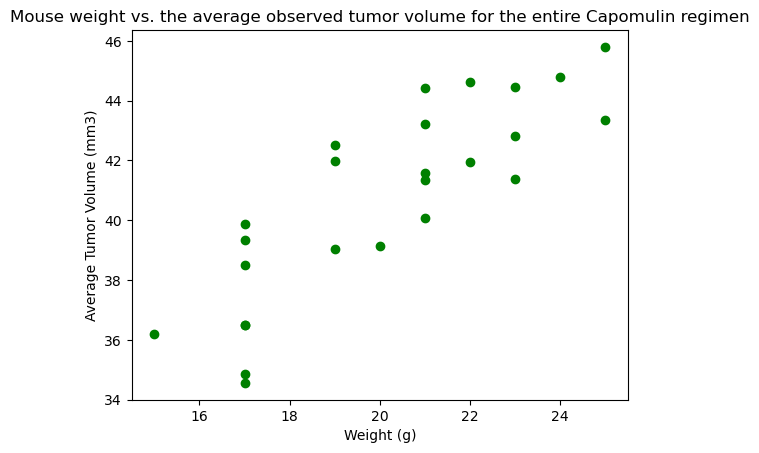

In [17]:
# Groups the Capomulin DataFrame by Mouse ID and outputs each of their average weight's and tumor volume's in a new DataFrame. 
average_capomulin_tumor = Capomulin.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

# Stores the series containing the weight data in a weight variable. 
weight = average_capomulin_tumor["Weight (g)"]

# Stores the series containing the average tumor volume data in a average_tumor_volume variable. 
average_tumor_volume = average_capomulin_tumor["Tumor Volume (mm3)"]

# Plots the scatter graph of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_plot = plt.scatter(weight, average_tumor_volume, color="green")

# Adds title and axis labels.
plt.title("Mouse weight vs. the average observed tumor volume for the entire Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume for the entire Capomulin regimen is 0.84
The r-squared is: 0.71


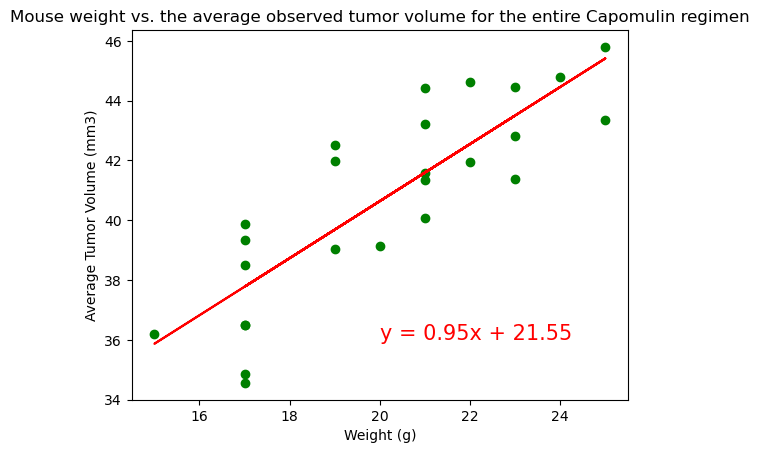

In [18]:
# Recreates the scatter plot from the previous code block...
# Groups the Capomulin DataFrame by Mouse ID and outputs each of their average weight's and tumor volume's in a new DataFrame. 
average_capomulin_tumor = Capomulin.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

# Stores the series containing the weight data in a weight variable. 
weight = average_capomulin_tumor["Weight (g)"]

# Stores the series containing the average tumor volume data in a average_tumor_volume variable. 
average_tumor_volume = average_capomulin_tumor["Tumor Volume (mm3)"]

# Plots the scatter graph of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen.
scatter_plot = plt.scatter(weight, average_tumor_volume, color="green")

# Adds title and axis labels.
plt.title("Mouse weight vs. the average observed tumor volume for the entire Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


# ---------------------------------------------------------------------------------------------------------------------

# Correlation and linear regression
# Prints the person correlation coefficient which describes the variability between the two factors.
print(f"The correlation between mouse weight and the average tumor volume for the entire Capomulin regimen is {round(st.pearsonr(weight, average_tumor_volume)[0],2)}")

# Linear model for weight versus average tumor volume for the entire Capomulin regimen.
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
plt.plot(weight, regress_values, "r-")

print(f"The r-squared is: {round(rvalue**2, 2)}")

plt.show()
